In [91]:
!pip install cvlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
import os
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
from glob import glob
import numpy as np
import matplotlib
import seaborn as sns
import PIL
PIL.Image
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import sys
import json
import pandas as pd
import cvlib as cv
from cvlib.object_detection import draw_bbox
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import tensorflow_datasets as tfds

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Add, BatchNormalization

In [95]:
def build_resnet(input_shape):
    inputs = Input(input_shape)

    net = Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu')(inputs)
    net = MaxPool2D()(net)

    net1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(net1)
    net3 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net2)

    net_1_1 = Conv2D(64, kernel_size=1, padding='same')(net)
    net = Add()([net_1_1, net3])

    net1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(net1)
    net3 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net2)

    net = Add()([net, net3])

    net = MaxPool2D()(net)

    net = Flatten()(net)
    net = Dense(5, activation='softmax')(net)

    model = tf.keras.Model(inputs = inputs, outputs = net, name = 'resnet')

    return model

In [96]:
batch_size = 32
img_height = 80
img_width = 50

In [97]:
dataset_path = '/content/drive/MyDrive/ZB/DL_project_2/temp_data/Training'

In [98]:
train_x = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size,
    color_mode = 'grayscale'
)

Found 85114 files belonging to 5 classes.
Using 68092 files for training.


In [99]:
dataset_path = '/content/drive/MyDrive/ZB/DL_project_2/temp_data/Training'
val_x = tf.keras.utils.image_dataset_from_directory(
    dataset_path,validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size,
    color_mode = 'grayscale'
)

Found 85114 files belonging to 5 classes.
Using 17022 files for validation.


In [100]:
for image_batch, labels_batch in train_x:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 80, 50, 1)
(32,)


In [101]:
from tensorflow.keras.layers import Activation
def build_resnet(input_shape):
    inputs = Input(input_shape)

    net = Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu')(inputs)
    net = MaxPool2D()(net)

    net1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(net1)
    net3 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net2)

    net_1_1 = Conv2D(64, kernel_size=1, padding='same')(net)
    net = Add()([net_1_1, net3])

    net1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(net1)
    net3 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net2)

    net = Add()([net, net3])

    net = MaxPool2D()(net)

    net = Flatten()(net)
    net = Dense(5, activation=None)(net)
    net = BatchNormalization()(net)
    net = Activation('softmax')(net)

    model = tf.keras.Model(inputs = inputs, outputs = net, name = 'resnet')

    return model

In [102]:
model2 = build_resnet((80,50,1))

In [103]:
model2.summary()

Model: "resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 80, 50, 1)]  0           []                               
                                                                                                  
 conv2d_80 (Conv2D)             (None, 40, 25, 32)   320         ['input_11[0][0]']               
                                                                                                  
 max_pooling2d_20 (MaxPooling2D  (None, 20, 12, 32)  0           ['conv2d_80[0][0]']              
 )                                                                                                
                                                                                                  
 conv2d_81 (Conv2D)             (None, 20, 12, 64)   2112        ['max_pooling2d_20[0][0]']  

In [104]:
learning_rate = 0.005
opt = tf.keras.optimizers.Adam(learning_rate)
loss = tf.keras.losses.sparse_categorical_crossentropy

model2.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [106]:
#hist2 = model2.fit(train_x, epochs=5, steps_per_epoch=68092//32, validation_data=val_x, validation_steps=17022//32)


hist2 = model2.fit(
  train_x,
  validation_data=val_x,
  epochs=5)

Epoch 1/5
2128/2128 [==============================] - 289s 136ms/step - loss: 0.7821 - accuracy: 0.6776 - val_loss: 0.7942 - val_accuracy: 0.6651
Epoch 2/5
2128/2128 [==============================] - 148s 69ms/step - loss: 0.6732 - accuracy: 0.7197 - val_loss: 0.6559 - val_accuracy: 0.7192
Epoch 3/5
2128/2128 [==============================] - 147s 69ms/step - loss: 0.6099 - accuracy: 0.7453 - val_loss: 0.6912 - val_accuracy: 0.7093
Epoch 4/5
2128/2128 [==============================] - 147s 69ms/step - loss: 0.5644 - accuracy: 0.7619 - val_loss: 0.5694 - val_accuracy: 0.7568
Epoch 5/5
2128/2128 [==============================] - 144s 68ms/step - loss: 0.5351 - accuracy: 0.7738 - val_loss: 0.7485 - val_accuracy: 0.6905


In [107]:
hist2.history

{'loss': [0.7820678949356079,
  0.6731522679328918,
  0.6098700165748596,
  0.5644386410713196,
  0.5351353883743286],
 'accuracy': [0.6776419878005981,
  0.7196733951568604,
  0.7452710866928101,
  0.7619397044181824,
  0.7737619876861572],
 'val_loss': [0.7942416667938232,
  0.655851423740387,
  0.6911603212356567,
  0.5694074034690857,
  0.7484943270683289],
 'val_accuracy': [0.6651365160942078,
  0.7191619873046875,
  0.70927494764328,
  0.7567678689956665,
  0.6905013918876648]}

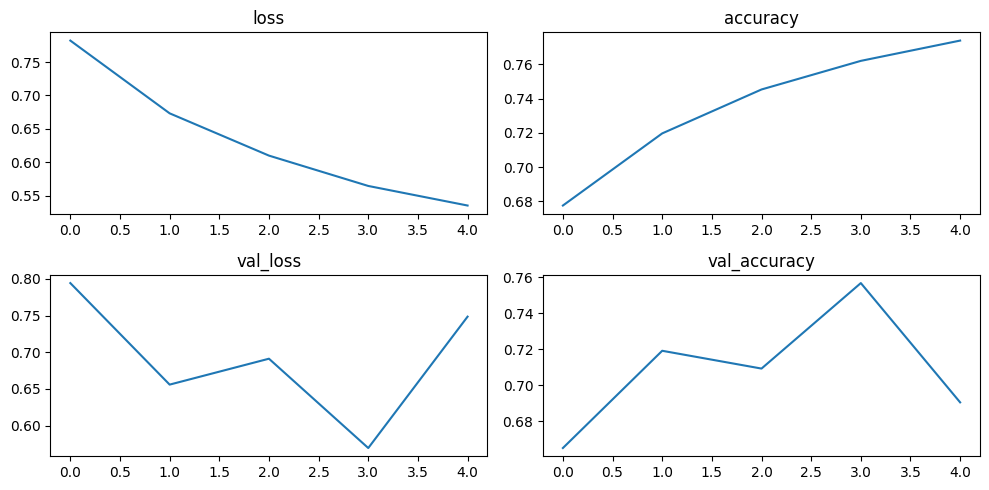

In [108]:
plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(hist2.history['loss'])
plt.title('loss')
plt.subplot(222)
plt.plot(hist2.history['accuracy'])
plt.title('accuracy')
plt.subplot(223)
plt.plot(hist2.history['val_loss'])
plt.title('val_loss')
plt.subplot(224)
plt.plot(hist2.history['val_accuracy'])
plt.title('val_accuracy')

plt.tight_layout()
plt.show()

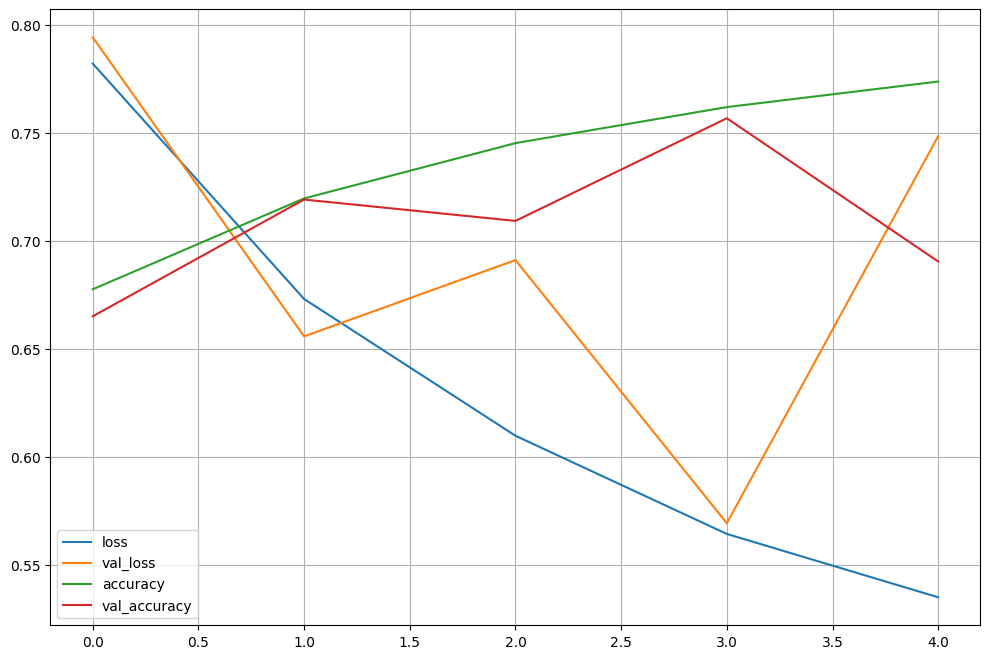

In [109]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist2.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [110]:
score2 = model2.evaluate(val_x)
score2

532/532 [==============================] - 32s 60ms/step - loss: 0.7485 - accuracy: 0.6905


[0.7485105395317078, 0.6904594302177429]

In [111]:
def build_resnet2(input_shape):
    inputs = Input(input_shape)

    net = Conv2D(32, kernel_size=3, strides=2, padding='same')(inputs)
    net = BatchNormalization()(net)  # BatchNormalization 추가
    net =  tf.keras.activations.relu(net)  # 활성화 함수를 직접 적용

    net = MaxPool2D()(net)

    net1 = Conv2D(64, kernel_size=1, padding='same')(net)
    net1 = BatchNormalization()(net1)  # BatchNormalization 추가
    net1 =  tf.keras.activations.relu(net1)  # 활성화 함수를 직접 적용

    net2 = Conv2D(64, kernel_size=3, padding='same')(net1)
    net2 = BatchNormalization()(net2)  # BatchNormalization 추가
    net2 =  tf.keras.activations.relu(net2)  # 활성화 함수를 직접 적용

    net3 = Conv2D(64, kernel_size=1, padding='same')(net2)
    net3 = BatchNormalization()(net3)  # BatchNormalization 추가
    net3 =  tf.keras.activations.relu(net3)  # 활성화 함수를 직접 적용

    net1_1 = Conv2D(64, kernel_size=1, padding='same')(net)
    net1_1 = BatchNormalization()(net1_1)  # BatchNormalization 추가
    net1_1 =  tf.keras.activations.relu(net1_1)  # 활성화 함수를 직접 적용

    net = Add()([net1_1, net3])

    net1 = Conv2D(64, kernel_size=1, padding='same')(net)
    net1 = BatchNormalization()(net1)  # BatchNormalization 추가
    net1 =  tf.keras.activations.relu(net1)  # 활성화 함수를 직접 적용

    net2 = Conv2D(64, kernel_size=3, padding='same')(net1)
    net2 = BatchNormalization()(net2)  # BatchNormalization 추가
    net2 =  tf.keras.activations.relu(net2)  # 활성화 함수를 직접 적용

    net3 = Conv2D(64, kernel_size=1, padding='same')(net2)
    net3 = BatchNormalization()(net3)  # BatchNormalization 추가
    net3 =  tf.keras.activations.relu(net3)  # 활성화 함수를 직접 적용

    net = Add()([net, net3])

    net = MaxPool2D()(net)

    net = Flatten()(net)
    net = Dense(5, activation='softmax')(net)

    model = tf.keras.Model(inputs=inputs, outputs=net)

    return model

In [112]:
model3 = build_resnet2((80,50,1))

In [113]:
learning_rate = 0.005
opt = tf.keras.optimizers.Adam(learning_rate)
loss = tf.keras.losses.sparse_categorical_crossentropy

model3.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [114]:
hist3 = model3.fit(
  train_x,
  validation_data=val_x,
  epochs=5)

Epoch 1/5
2128/2128 [==============================] - 153s 69ms/step - loss: 1.3035 - accuracy: 0.5897 - val_loss: 1.4738 - val_accuracy: 0.4377
Epoch 2/5
2128/2128 [==============================] - 146s 68ms/step - loss: 0.6312 - accuracy: 0.7386 - val_loss: 1.1704 - val_accuracy: 0.5919
Epoch 3/5
2128/2128 [==============================] - 145s 68ms/step - loss: 0.5202 - accuracy: 0.7816 - val_loss: 0.7136 - val_accuracy: 0.7176
Epoch 4/5
2128/2128 [==============================] - 146s 68ms/step - loss: 0.4714 - accuracy: 0.8006 - val_loss: 0.5078 - val_accuracy: 0.7815
Epoch 5/5
2128/2128 [==============================] - 145s 68ms/step - loss: 0.4299 - accuracy: 0.8165 - val_loss: 0.5034 - val_accuracy: 0.7844


In [115]:
hist3.history

{'loss': [1.30351722240448,
  0.6312477588653564,
  0.5201922655105591,
  0.4713635742664337,
  0.42988091707229614],
 'accuracy': [0.5897168517112732,
  0.7386476993560791,
  0.7816190123558044,
  0.8006079792976379,
  0.8165276646614075],
 'val_loss': [1.4738479852676392,
  1.1703523397445679,
  0.7135772705078125,
  0.5078118443489075,
  0.5034159421920776],
 'val_accuracy': [0.43766888976097107,
  0.5919398665428162,
  0.7176007628440857,
  0.7814592719078064,
  0.7843966484069824]}

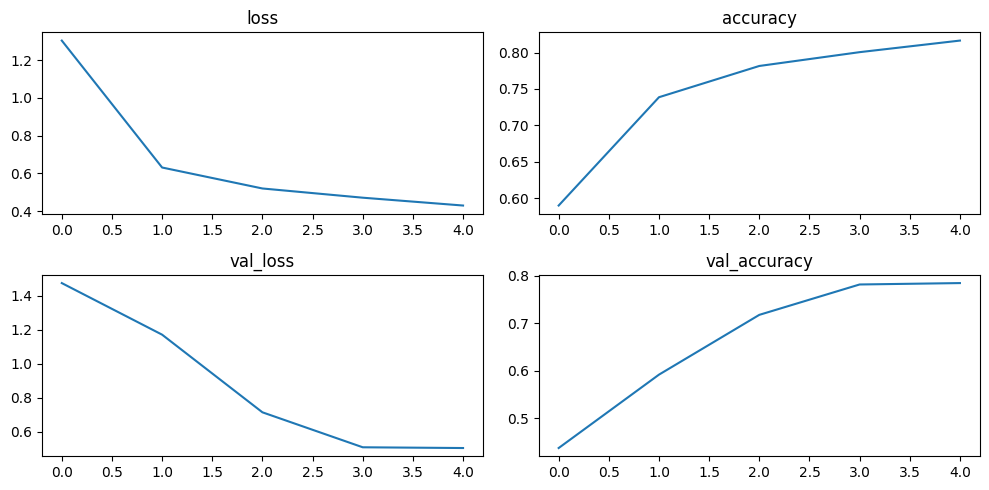

In [116]:
plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(hist3.history['loss'])
plt.title('loss')
plt.subplot(222)
plt.plot(hist3.history['accuracy'])
plt.title('accuracy')
plt.subplot(223)
plt.plot(hist3.history['val_loss'])
plt.title('val_loss')
plt.subplot(224)
plt.plot(hist3.history['val_accuracy'])
plt.title('val_accuracy')

plt.tight_layout()
plt.show()